In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib,pprint,keras

import FBNN2d,sei_kume,myResNet
importlib.reload(FBNN2d)
importlib.reload(sei_kume)
importlib.reload(myResNet)
from FBNN2d import *
from sei_kume import *
from myResNet import *

# 固有値の内1つを0に固定

1. 通常のNN

Test loss, Test mae: 18.814881, 3.401100


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


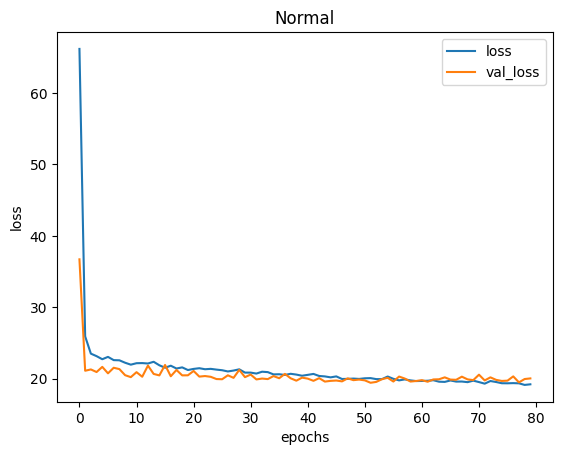

In [30]:
# (x_train,y_train) = gene_data_Normalize(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=2000,multi=100,center=np.pi)
# test_data    = [gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(10)]

(x_train,y_train) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=2000,multi=100)
test_data    = [gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(10)]

model = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

history = model.fit(x_train, y_train, verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save("./models/mymodel_0start1.h5", include_optimizer=False)

fig, axes = plt.subplots() #ncols=2, figsize=(14, 5)
df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="Normal")

plt.show()

Test loss, Test mae: 20.625942, 3.393660
logLdiff: 1.3788137344511013


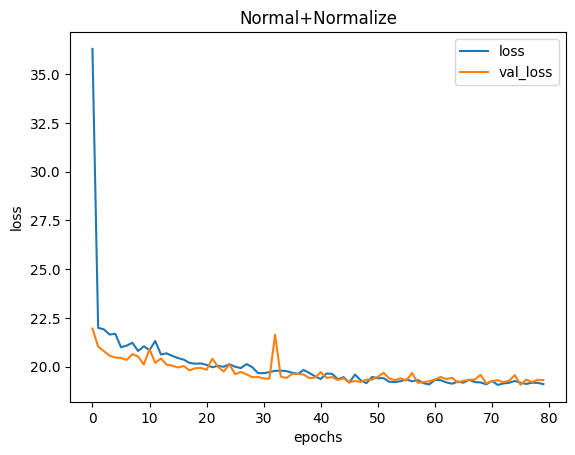

In [14]:
(x_train,y_train) = gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=2000,multi=100,center=np.pi)
test_data    = [gene_data_Normalize(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=np.pi) for _ in range(10)]

# (x_train,y_train) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=2000,multi=100)
# test_data    = [gene_data(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100) for _ in range(10)]

model = set_model_LeakyReLU(n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)

history = model.fit(x_train, y_train, verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores = [model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test)[0] )
print("logLdiff:",np.mean(res))

fig, axes = plt.subplots() #ncols=2, figsize=(14, 5)
df1 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df1.plot(ax=axes,xlabel="epochs",ylabel="loss",title="Normal+Normalize")

plt.show()

2. eig[0]=0 ($\Sigma,\mu$ から生成　：$\Sigma^{-1}$の１つ目の固有値を０に)

Test loss, Test mae: 40.042381, 4.174971


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


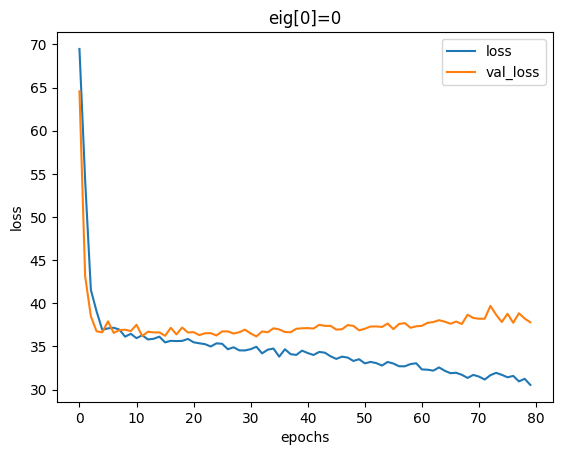

In [16]:
(x_train,y_train) = gene_data_zero(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1000,center=None)
test_data         = [gene_data_zero(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=None) for _ in range(10)]

model = set_model_zero_LeakyReLU(output_shape=5,n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
# model = set_model_zero_LeakyReLU(n_hidden=900,n_layer=8,print_summary=False,leaky_alpha=0.01)

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )


scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save('./models/mymodel_0start2.h5', include_optimizer=False)

fig, axes = plt.subplots()
df2 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df2.plot(ax=axes,xlabel="epochs",ylabel="loss",title="eig[0]=0")

plt.show()

Test loss, Test mae: 32.545695, 3.251245


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


logLdiff: 1.0469675083225056


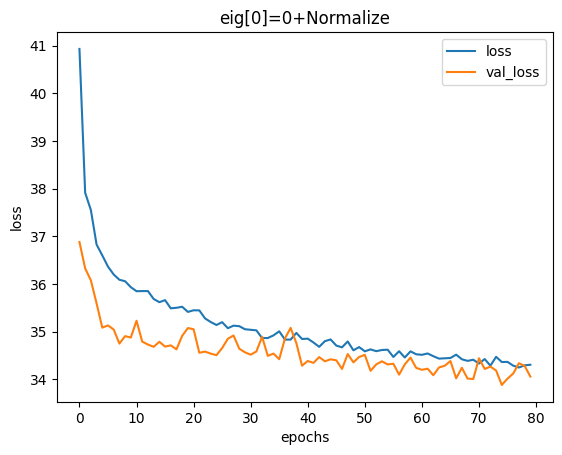

In [36]:
(x_train,y_train) = gene_data_zero(hist_gene,Sig_lim=20,mu_lim=20,gene_size=5000,multi=1000,center=np.pi)
test_data         = [gene_data_zero(hist_gene,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000,center=np.pi) for _ in range(10)]

model = set_model_zero_LeakyReLU(output_shape=5,n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
# model = set_model_zero_LeakyReLU(n_hidden=900,n_layer=8,print_summary=False,leaky_alpha=0.01)

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # epochs=80,200,100
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save('./models/mymodel_0startN2.h5', include_optimizer=False)

res=[]
for (x_test,y_test) in test_data:
    res.append( comp_logL_Sigmu(model,x_test,y_test)[0] )
print("logLdiff:",np.mean(res))

fig, axes = plt.subplots()
df2 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df2.plot(ax=axes,xlabel="epochs",ylabel="loss",title="eig[0]=0+Normalize")

plt.show()
# 1.236
# 1.196
# 1.1182378790529

3. th[0]=ga[0]=0 ($\Sigma,\mu$ から生成　：$\Sigma^{-1}$の１つ目の固有値を０に)

Test loss, Test mae: 928.314386, 12.183365


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


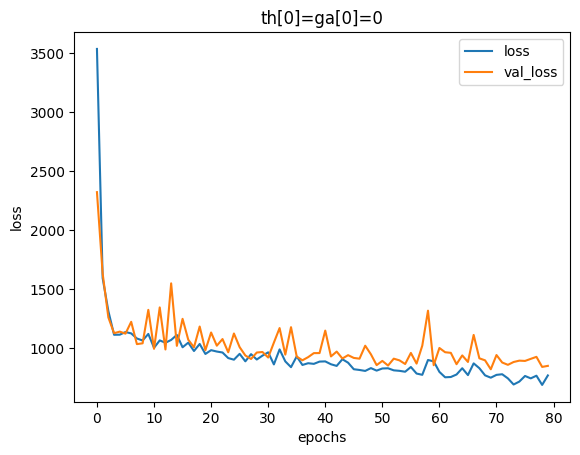

In [17]:
(x_train,y_train) = gene_data_zero_thga2(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1000,center=None)
test_data         = [gene_data_zero_thga2(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000,center=None) for _ in range(10)]

model = set_model_zero_LeakyReLU(output_shape=3,n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
# model = set_model_zero_LeakyReLU(n_hidden=900,n_layer=8,print_summary=False,leaky_alpha=0.01)

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )


scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save('./models/mymodel_0start3.h5', include_optimizer=False)

fig, axes = plt.subplots()
df3 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df3.plot(ax=axes,xlabel="epochs",ylabel="loss",title="th[0]=ga[0]=0")

plt.show()

4. th[0]=0 ($\theta,\gamma,O$ から生成) 

Test loss, Test mae: 18.818918, 3.497575


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


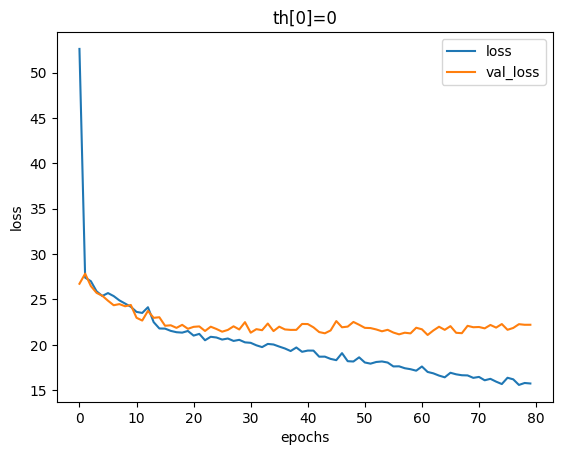

In [21]:
(x_train,y_train) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1000)
test_data         = [gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000) for _ in range(10)]

model = set_model_zero_LeakyReLU(output_shape=4,n_hidden=400,n_layer=5,print_summary=False,leaky_alpha=0.01)
# model = set_model_zero_LeakyReLU(n_hidden=900,n_layer=8,print_summary=False,leaky_alpha=0.01)

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )


scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save('./models/mymodel_0start4.h5', include_optimizer=False)

fig, axes = plt.subplots()
df4 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df4.plot(ax=axes,xlabel="epochs",ylabel="loss",title="th[0]=0")

plt.show()

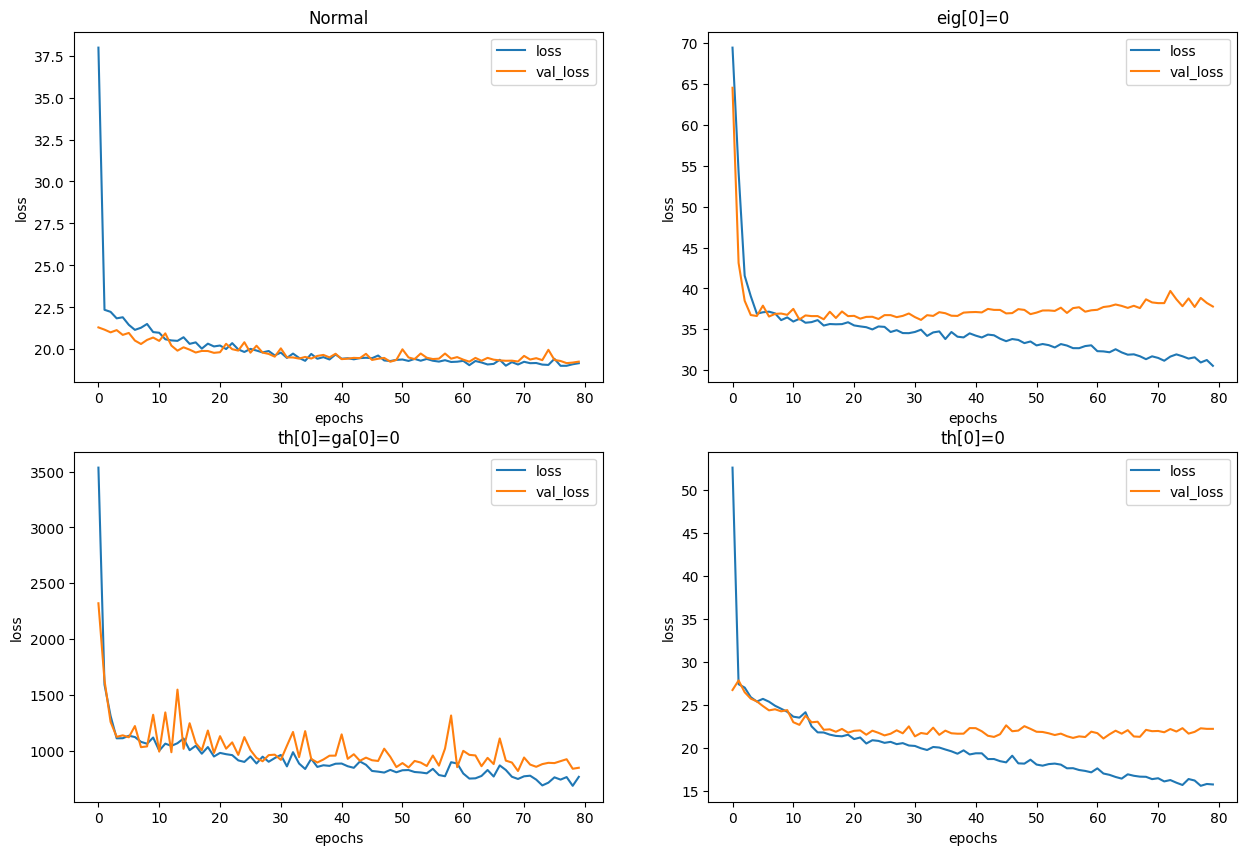

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15, 10))
df1.plot(ax=axes[0,0],xlabel="epochs",ylabel="loss",title="Normal")
df2.plot(ax=axes[0,1],xlabel="epochs",ylabel="loss",title="eig[0]=0")
df3.plot(ax=axes[1,0],xlabel="epochs",ylabel="loss",title="th[0]=ga[0]=0")
df4.plot(ax=axes[1,1],xlabel="epochs",ylabel="loss",title="th[0]=0")
plt.show()

5. 尤度関数による評価

In [42]:
gene_size=1000
print_size=int(gene_size/5)
# (x_test,y_test) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=500,multi=1000)
(x_test,Sigmus) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=gene_size,multi=1000)

for num in [1,2,3,4]:
    model = keras.models.load_model("./models/mymodel_0start%d.h5"%num, compile=False)
    res=[]
    y_preds = model.predict(x_test)
    for i,y_pred in enumerate(y_preds):
        if(num<=2):
            Sig0 = [y_pred[0:2],y_pred[1:3]]
            mu0 = y_pred[3:5]
            # print(np.linalg.eig(Sig0)[1].T)
            O0 = np.linalg.eig(Sig0)[1].T
            O0 = np.diag(np.sign(O0@Sig0@mu0)+1e-2)@O0
            th0 = np.diag(O0@Sig0@O0.T)/2
            ga0 = O0@Sig0@mu0
        elif(num==3):
            th0 = [0,y_pred[0]]
            ga0 = [0,y_pred[1]]
            O0 = rad2so_2(y_pred[2])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)
        elif(num==4):
            th0 = [0,y_pred[0]]
            ga0 = y_pred[1:3]
            O0 = rad2so_2(y_pred[3])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)

        # th_T,ga_T = np.array([0,y_test[i][0]]),np.array(y_test[i][1:3])
        # O_T = rad2so_2(y_test[i][3])
        Sig_T=[Sigmus[i][0:2],Sigmus[i][1:3]]
        mu_T=Sigmus[i][3:5]
        O_T = np.linalg.eig(Sig_T)[1].T
        O_T = np.diag(np.sign(O_T@Sig_T@mu_T))@O_T
        th_T = np.diag(O_T@Sig_T@O_T.T)/2
        ga_T = O_T@Sig_T@mu_T

        hist = x_test[i]
        A,B,n = AB_gene(hist)

        log_0 = Loglikelihood(th0,ga0,A,B,O=O0,n=1,method="hg")
        log_T = Loglikelihood(th_T,ga_T,A,B,O=O_T,n=1,method="hg")
        # print("%2d:log_T, log_0: %f, %f"%(i+1,log_T["log"],log_0["log"]))
        res.append(abs(log_T["log"]-log_0["log"]))
        if(i%print_size==0): print(res[-1])
    print("%d:mean diff:"%num, np.mean(res))

32/32 [==============================] - 0s 2ms/step
1.7754428588426947
1.9970627735985431
2.103150501043899
1.9415691743604953
1.972233857436521
1:mean diff: 1.877212848196021
32/32 [==============================] - 0s 3ms/step
0.7125432536673486
1.5211646602799078
1.2554964166293985
0.9189281856349396
1.7515634239829012
2:mean diff: 1.2181361401559179
32/32 [==============================] - 0s 2ms/step
75.55645316855271
198.37549691156983
270.73638030998086
87.4008648319153
359.51036300539454
3:mean diff: 136.83946937750133
32/32 [==============================] - 0s 2ms/step
44.91754112913223
38.80488266712747
54.16882009949989
39.19134466293419
64.04299763167398
4:mean diff: 26.514281936488477


# ResNet

Test loss, Test mae: 22.635287, 3.792156


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test loss, Test mae: 22.842531, 3.808439


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


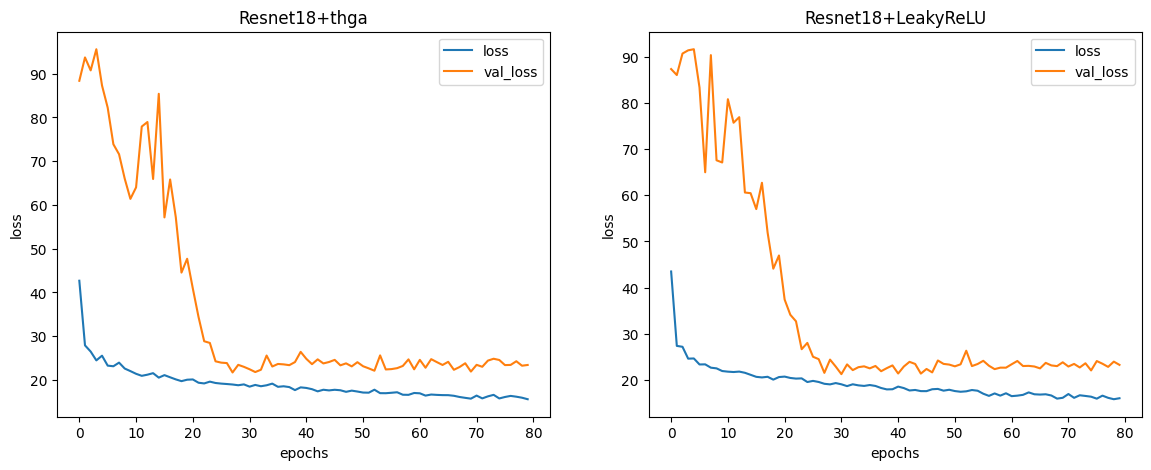

In [67]:
(x_train,y_train) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1e4)
test_data         = [gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=20,multi=1e4) for _ in range(10)]

models=[]
models.append(build((20,), 4, 400,hidden_layer=18))
models.append(build((20,), 4, 400,hidden_layer=18,leakyReLU=True,leaky_alpha=0.05))

fig, axes = plt.subplots(ncols=2, figsize=(14, 5))
titles=["Resnet18+thga","Resnet18+LeakyReLU"]
df12=[]

for i,model in enumerate(models):
    model.compile(loss='mse',
                    optimizer='adam',
                    # optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
                    metrics=['mae'])

    history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                        epochs=80, validation_split=0.2, shuffle=True
                        # batch_size=30,validation_data=(x_test, y_test)
                        )


    scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
    score = np.mean(scores,axis=0)
    print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
    model.save("./models/mymodel_0start%d.h5"%(i+5), include_optimizer=False)

    df = pd.DataFrame(history.history)[['loss', 'val_loss']]
    df.plot(ax=axes[i],xlabel="epochs",ylabel="loss",title=titles[i])
    df12.append(df)
plt.show()

In [60]:
gene_size=100
print_size=int(gene_size/3)
# (x_test,y_test) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=500,multi=1000)
(x_test,Sigmus) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=gene_size,multi=1000)

for num in [5,6]:
    model = keras.models.load_model("./models/mymodel_0start%d.h5"%num, compile=False)
    res=[]
    y_preds = model.predict(x_test)
    for i,y_pred in enumerate(y_preds):
        if(num<=2):
            Sig0 = [y_pred[0:2],y_pred[1:3]]
            mu0 = y_pred[3:5]
            # print(np.linalg.eig(Sig0)[1].T)
            O0 = np.linalg.eig(Sig0)[1].T
            O0 = np.diag(np.sign(O0@Sig0@mu0)+1e-2)@O0
            th0 = np.diag(O0@Sig0@O0.T)/2
            ga0 = O0@Sig0@mu0
        elif(num==3):
            th0 = [0,y_pred[0]]
            ga0 = [0,y_pred[1]]
            O0 = rad2so_2(y_pred[2])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)
        elif(num>=4):
            th0 = [0,y_pred[0]]
            ga0 = y_pred[1:3]
            O0 = rad2so_2(y_pred[3])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)

        # th_T,ga_T = np.array([0,y_test[i][0]]),np.array(y_test[i][1:3])
        # O_T = rad2so_2(y_test[i][3])
        Sig_T=[Sigmus[i][0:2],Sigmus[i][1:3]]
        mu_T=Sigmus[i][3:5]
        O_T = np.linalg.eig(Sig_T)[1].T
        O_T = np.diag(np.sign(O_T@Sig_T@mu_T))@O_T
        th_T = np.diag(O_T@Sig_T@O_T.T)/2
        ga_T = O_T@Sig_T@mu_T

        hist = x_test[i]
        A,B,n = AB_gene(hist)

        log_0 = Loglikelihood(th0,ga0,A,B,O=O0,n=1,method="hg")
        log_T = Loglikelihood(th_T,ga_T,A,B,O=O_T,n=1,method="hg")
        # print("%2d:log_T, log_0: %f, %f"%(i+1,log_T["log"],log_0["log"]))
        res.append(abs(log_T["log"]-log_0["log"]))
        if(i%print_size==0): print(res[-1])
    print("%d:mean diff:"%num, np.mean(res))

4/4 [==============================] - 0s 6ms/step
34.65806997773875
26.715392637728677
0.16079146696894142
63.88528627157227
5:mean diff: 37.66833627915497
4/4 [==============================] - 0s 6ms/step
0.08021379442923582
17.53143830966888
76.88029960624883
24.38905404951407
6:mean diff: 31.3842069838304


### eig[0]=0 + Resnet18 + ReLU

Test loss, Test mae: 43.112704, 4.278512


/home/user/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


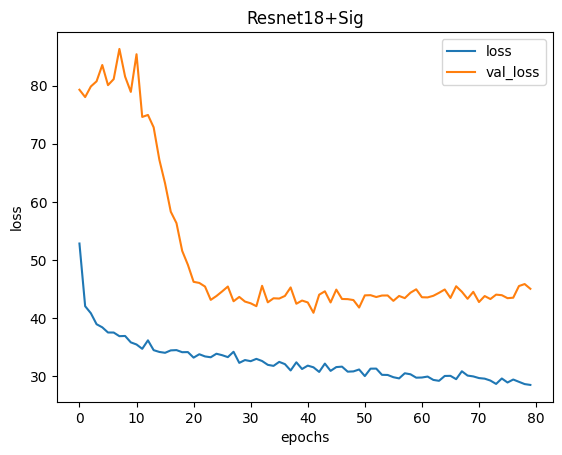

In [69]:
(x_train,y_train) = gene_data_zero(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1000,center=None)
test_data         = [gene_data_zero(hist_gene_int,Sig_lim=20,mu_lim=20,gene_size=20,multi=100,center=None) for _ in range(10)]

model = build((20,), 5, 400,hidden_layer=18)

model.compile(loss='mse',
                optimizer='adam',
                # optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
                metrics=['mae'])

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    # batch_size=30,validation_data=(x_test, y_test)
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))
model.save("./models/mymodel_0start7.h5", include_optimizer=False)

fig, axes = plt.subplots()
df3 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df3.plot(ax=axes,xlabel="epochs",ylabel="loss",title="Resnet18+Sig")
plt.show()

Test loss, Test mae: 38.169784, 3.690762
logLdiff: 4.843987986535629


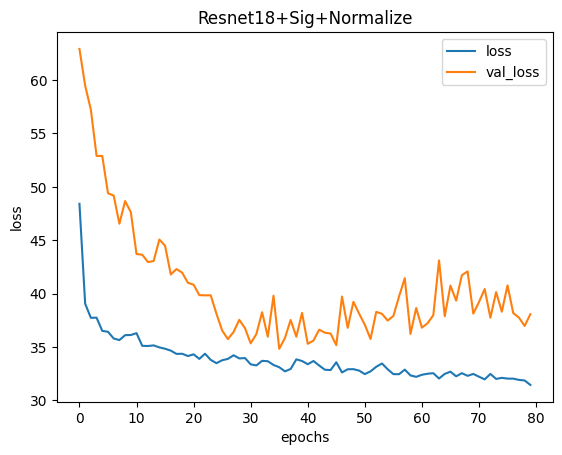

In [35]:
(x_train,y_train) = gene_data_zero(hist_gene,Sig_lim=20,mu_lim=20,gene_size=1000,multi=1000,center=np.pi)
test_data         = [gene_data_zero(hist_gene,Sig_lim=20,mu_lim=20,gene_size=20,multi=1000,center=np.pi) for _ in range(10)]

model = build((20,), 5, 400,hidden_layer=18)

model.compile(loss='mse',
                optimizer='adam',
                # optimizer=optimizers.SGD(lr=1e-3, momentum=0.9),
                metrics=['mae'])

history = model.fit(np.array(x_train), np.array(y_train), verbose=0,
                    epochs=80, validation_split=0.2, shuffle=True
                    )

scores=[model.evaluate(x_test, y_test, verbose=0) for (x_test, y_test) in test_data]
score = np.mean(scores,axis=0)
print("Test loss, Test mae: %f, %f" % (score[0], score[1]))

res=[]
for (x_test,y_test) in test_data[:1]:
    res.append( comp_logL_Sigmu(model,x_test,y_test)[0] )
print("logLdiff:",np.mean(res))

fig, axes = plt.subplots()
df3 = pd.DataFrame(history.history)[['loss', 'val_loss']]
df3.plot(ax=axes,xlabel="epochs",ylabel="loss",title="Resnet18+Sig+Normalize")
plt.show()

In [65]:
gene_size=500
print_size=int(gene_size/5)
# (x_test,y_test) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=500,multi=1000)
(x_test,Sigmus) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=gene_size,multi=1000)

for num in [7]:
    model = keras.models.load_model("./models/mymodel_0start%d.h5"%num, compile=False)
    res=[]
    y_preds = model.predict(x_test)
    for i,y_pred in enumerate(y_preds):
        Sig0 = [y_pred[0:2],y_pred[1:3]]
        mu0 = y_pred[3:5]
        # print(np.linalg.eig(Sig0)[1].T)
        O0 = np.linalg.eig(Sig0)[1].T
        O0 = np.diag(np.sign(O0@Sig0@mu0)+1e-2)@O0
        th0 = np.diag(O0@Sig0@O0.T)/2
        ga0 = O0@Sig0@mu0
        
        Sig_T=[Sigmus[i][0:2],Sigmus[i][1:3]]
        mu_T=Sigmus[i][3:5]
        O_T = np.linalg.eig(Sig_T)[1].T
        O_T = np.diag(np.sign(O_T@Sig_T@mu_T))@O_T
        th_T = np.diag(O_T@Sig_T@O_T.T)/2
        ga_T = O_T@Sig_T@mu_T

        hist = x_test[i]
        A,B,n = AB_gene(hist)

        log_0 = Loglikelihood(th0,ga0,A,B,O=O0,n=1,method="hg")
        log_T = Loglikelihood(th_T,ga_T,A,B,O=O_T,n=1,method="hg")
        res.append(abs(log_T["log"]-log_0["log"]))
        if(i%print_size==0): print(res[-1])
    print("%d:mean diff:"%num, np.mean(res))

16/16 [==============================] - 1s 9ms/step
2.552676973587296
2.0996121207111003
2.1535487963869997
0.5238992187006346
1.102582728101396
7:mean diff: 1.5549770005699954


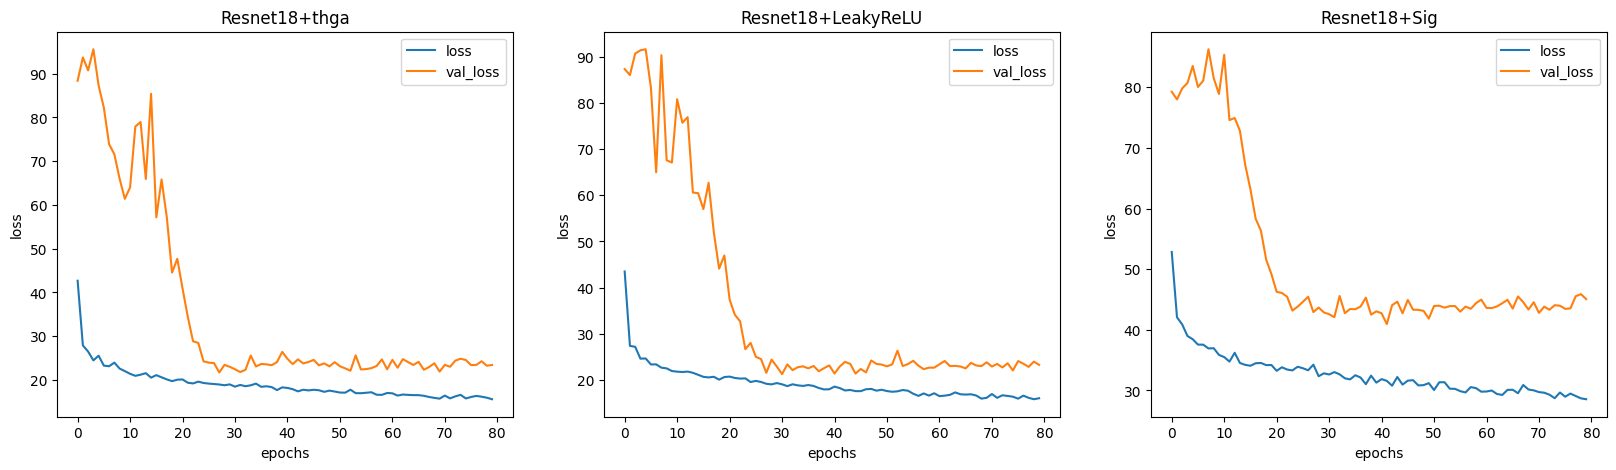

In [77]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
titles=["Resnet18+thga","Resnet18+LeakyReLU","Resnet18+Sig"]

for i,df in enumerate(df12+[df3]):
    df.plot(ax=axes[i],xlabel="epochs",ylabel="loss",title=titles[i])

plt.show()

## まとめ

In [66]:
gene_size=500
print_size=int(gene_size/2)
# (x_test,y_test) = gene_data_zero_thga3(hist_gene_thga2,Sig_lim=20,mu_lim=20,gene_size=500,multi=1000)
(x_test,Sigmus) = gene_data(hist_gene_true,Sig_lim=20,mu_lim=20,gene_size=gene_size,multi=1000)

for num in range(1,8):
    model = keras.models.load_model("./models/mymodel_0start%d.h5"%num, compile=False)
    res=[]
    y_preds = model.predict(x_test)
    for i,y_pred in enumerate(y_preds):
        if(num<=2 or num==7):
            Sig0 = [y_pred[0:2],y_pred[1:3]]
            mu0 = y_pred[3:5]
            # print(np.linalg.eig(Sig0)[1].T)
            O0 = np.linalg.eig(Sig0)[1].T
            O0 = np.diag(np.sign(O0@Sig0@mu0)+1e-2)@O0
            th0 = np.diag(O0@Sig0@O0.T)/2
            ga0 = O0@Sig0@mu0
        elif(num==3):
            th0 = [0,y_pred[0]]
            ga0 = [0,y_pred[1]]
            O0 = rad2so_2(y_pred[2])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)
        elif(num>=4):
            th0 = [0,y_pred[0]]
            ga0 = y_pred[1:3]
            O0 = rad2so_2(y_pred[3])
            O0 = np.diag(np.sign(np.array(ga0)+1e-2))@O0
            ga0 = np.abs(ga0)

        # th_T,ga_T = np.array([0,y_test[i][0]]),np.array(y_test[i][1:3])
        # O_T = rad2so_2(y_test[i][3])
        Sig_T=[Sigmus[i][0:2],Sigmus[i][1:3]]
        mu_T=Sigmus[i][3:5]
        O_T = np.linalg.eig(Sig_T)[1].T
        O_T = np.diag(np.sign(O_T@Sig_T@mu_T))@O_T
        th_T = np.diag(O_T@Sig_T@O_T.T)/2
        ga_T = O_T@Sig_T@mu_T

        hist = x_test[i]
        A,B,n = AB_gene(hist)

        log_0 = Loglikelihood(th0,ga0,A,B,O=O0,n=1,method="hg")
        log_T = Loglikelihood(th_T,ga_T,A,B,O=O_T,n=1,method="hg")
        # print("%2d:log_T, log_0: %f, %f"%(i+1,log_T["log"],log_0["log"]))
        res.append(abs(log_T["log"]-log_0["log"]))
        # if(i%print_size==0): print(res[-1])
    print("%d:mean diff:"%num, np.mean(res))

16/16 [==============================] - 0s 2ms/step
1:mean diff: 1.9793488828525232
16/16 [==============================] - 0s 3ms/step
2:mean diff: 1.1961274262795032
16/16 [==============================] - 0s 2ms/step
3:mean diff: 144.04019425853346
16/16 [==============================] - 0s 2ms/step
4:mean diff: 27.269304154719233
16/16 [==============================] - 0s 6ms/step
5:mean diff: 37.53564401652407
16/16 [==============================] - 0s 6ms/step
6:mean diff: 33.833514204550156
16/16 [==============================] - 0s 6ms/step
7:mean diff: 1.595966560241421
